In [1]:
import pandas as pd

In [31]:
df=pd.read_csv("https://ibm.box.com/shared/static/2sb5d31p0yz7y8vqumjpe811q40nxpgd.csv")
#df.head()
columns=["Timestamp","Chatbots","Artificial Intelligence","Big Data","Databases","Internet of Things","Blockchain","Data Science","Virtual Reality / Augmented Reality",
        "Data Visualization","Machine Learning","Data Analysis / Statistics","Big Data (Spark / Hadoop)","Data Journalism","Deep Learning","X","Y"]
df.columns=columns
#df.head()

In [169]:
df_sample=df[["Big Data (Spark / Hadoop)","Data Analysis / Statistics","Data Journalism","Data Visualization","Deep Learning","Machine Learning"]]
#df_sample1=df["Big Data (Spark / Hadoop)"]
#df_sample1.groupby[""]

df1=pd.DataFrame(df_sample["Big Data (Spark / Hadoop)"].value_counts())
df2=pd.DataFrame(df_sample["Data Analysis / Statistics"].value_counts())
df3=pd.DataFrame(df_sample["Data Visualization"].value_counts())
df4=pd.DataFrame(df_sample["Data Journalism"].value_counts())
df5=pd.DataFrame(df_sample["Deep Learning"].value_counts())
df6=pd.DataFrame(df_sample["Machine Learning"].value_counts())
#df6.head()
df_final=(df1.join(df2).join(df4).join(df3).join(df5).join(df6)).transpose()
df_final.head(6)


,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [170]:
df_final.sort_values('Very interested',axis=0,ascending=False,inplace=True,na_position='last')
#df_final['Total']=df_final.sum(axis=1)
df_final.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


In [171]:
df_final["Very interested"] =round( (df_final["Very interested"] / 2233) * 100,2)
df_final["Somewhat interested"] =round( (df_final["Somewhat interested"] / 2233) * 100 , 2)
df_final["Not interested"]=round( (df_final["Not interested"] / 2233) * 100 , 2)
df_final.head(6)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


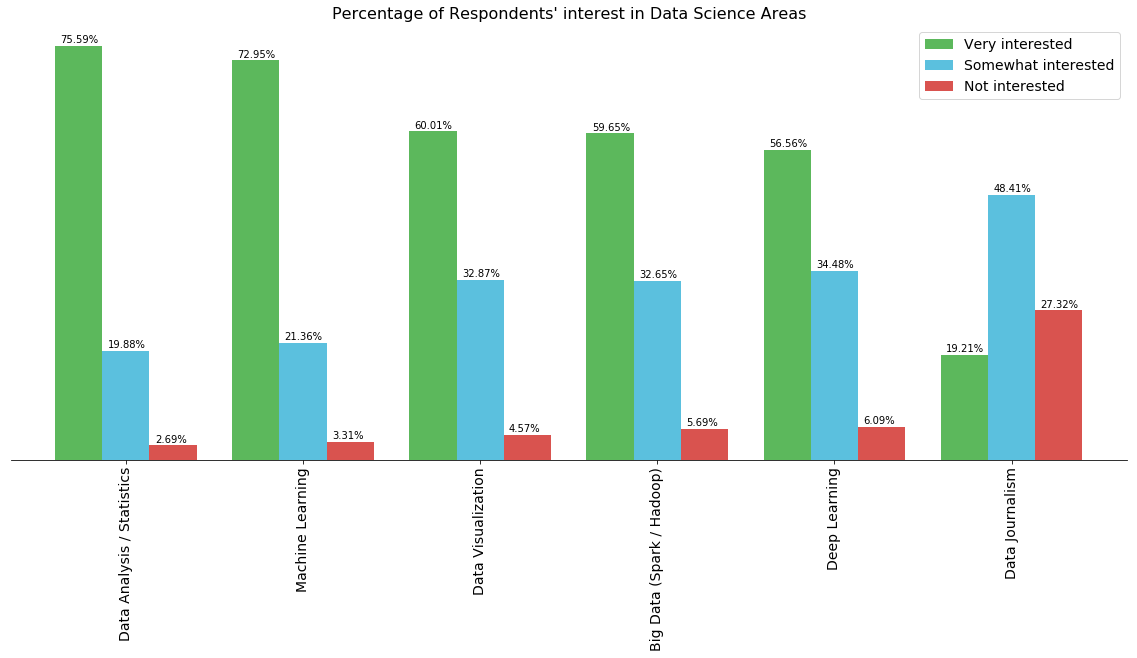

In [172]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

ax=df_final[["Very interested","Somewhat interested","Not interested"]].plot(kind="bar",
                                                                        figsize=(20,8),
                                                                         color=["#5cb85c","#5bc0de","#d9534f"],
                                                                         width=0.8,
                                                                         fontsize=14,
                                                                          )

plt.legend(fontsize=14)
ax.set_title("Percentage of Respondents' interest in Data Science Areas",fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

#[ax.text(v , i,'{:.2f%}'.format(v)) for i,v in enumerate(df_final)]

for i in ax.patches:
    ax.text(i.get_x()+.03,i.get_height()+.5,str(i.get_height())+'%')

#plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

In [174]:
df_crime=pd.read_csv("https://cocl.us/sanfran_crime_dataset")

In [187]:
df_crime.shape

(150500, 13)

In [201]:
df_count=pd.DataFrame(df_crime[["PdDistrict"]].groupby("PdDistrict").size().to_frame('Count').reset_index())
df_count.rename(columns={"PdDistrict":"Neighborhood"},
                        inplace=True)
df_count

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [203]:
!wget --quiet https://cocl.us/sanfran_geojson -O SanFranc_Neighbor.json
world_geo=r'SanFranc_Neighbor.json'
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [214]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
!conda install -c conda-forge folium=0.5.0 --yes

import folium

print('Folium installed and imported!')

Solving environment: \ Killed


ModuleNotFoundError: No module named 'folium'

In [212]:


world_map = folium.Map(location[0,0],Zoom_start=2, tiles="Mapbox Bright")

NameError: name 'folium' is not defined